In [5]:
# Importação das bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
from yellowbrick.classifier import ConfusionMatrix
from sklearn.naive_bayes import GaussianNB
#conda install -c conda-forge python-graphviz (para evitar warnings)

In [4]:
!pip install yellowbrick

In [6]:
# Carregamento da base de dados e definição dos previsores (variáveis independentes - X) e classe (variável dependente - y)
credito = pd.read_csv('Credit.csv')
credito.shape

(1000, 21)

In [7]:
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values

In [8]:
# Conversão dos atributos categóricos para atributos numéricos, passando o índice de cada atributo categórico
labelencoder = LabelEncoder()
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:, 3] = labelencoder.fit_transform(previsores[:, 3])
previsores[:, 5] = labelencoder.fit_transform(previsores[:, 5])
previsores[:, 6] = labelencoder.fit_transform(previsores[:, 6])
previsores[:, 8] = labelencoder.fit_transform(previsores[:, 8])
previsores[:, 9] = labelencoder.fit_transform(previsores[:, 9])
previsores[:, 11] = labelencoder.fit_transform(previsores[:, 11])
previsores[:, 13] = labelencoder.fit_transform(previsores[:, 13])
previsores[:, 14] = labelencoder.fit_transform(previsores[:, 14])
previsores[:, 16] = labelencoder.fit_transform(previsores[:, 16])
previsores[:, 18] = labelencoder.fit_transform(previsores[:, 18])
previsores[:, 19] = labelencoder.fit_transform(previsores[:, 19])

In [10]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.2,
                                                                  random_state = 0)

In [11]:
# Criação e treinamento do modelo
arvore = DecisionTreeClassifier()
arvore.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier()

In [12]:
export_graphviz(arvore, out_file = 'tree.dot')

In [13]:
# Obtenção das previsões
previsoes = arvore.predict(X_teste)
previsoes

array(['bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'good', 'good', 'bad', 'good',
       'good', 'bad', 'good', 'good', 'bad', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'bad', 'good', 'bad', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good',
       'good', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'bad', 'bad', 'good', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'good', 'good', 'good',
       'bad', 'bad', 'bad', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 

In [14]:
#matriz de confusão
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 28,  30],
       [ 29, 113]], dtype=int64)

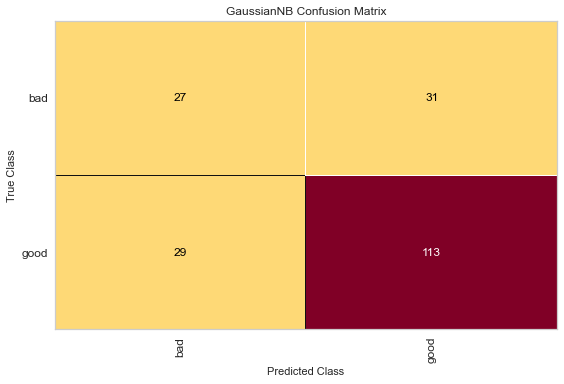

<AxesSubplot:title={'center':'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [15]:
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

In [16]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.705

In [17]:
taxa_erro = 1 - taxa_acerto
taxa_erro

0.29500000000000004